In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True

In [4]:
dat = pd.read_csv("../case-hosp-death.csv")
dat["DATE_OF_INTEREST"] = pd.to_datetime(dat["DATE_OF_INTEREST"])
dat = dat.set_index("DATE_OF_INTEREST")

In [5]:
dat.head()

,NEW_COVID_CASE_COUNT,HOSPITALIZED_CASE_COUNT,DEATH_COUNT
DATE_OF_INTEREST,,,
2020-03-02,1,12.0,NaN
2020-03-03,4,10.0,NaN
2020-03-04,10,13.0,NaN
2020-03-05,2,18.0,NaN
2020-03-06,8,17.0,NaN


Text(0.5, 1.0, 'Cases/day')

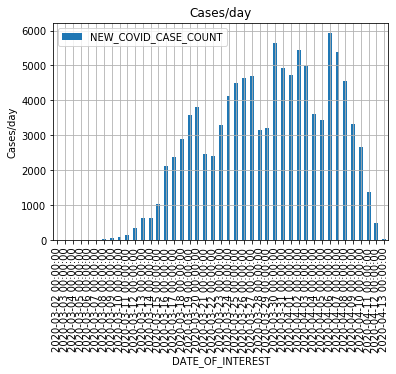

In [6]:
dat[["NEW_COVID_CASE_COUNT"]].plot(kind="bar")
plt.ylabel("Cases/day")
plt.title("Cases/day")

In [7]:
dat["Cases/day, 7 day avg"] = dat["NEW_COVID_CASE_COUNT"].rolling(window="7D").mean()

Text(0.5, 1.0, 'Cases/day, 7 day average')

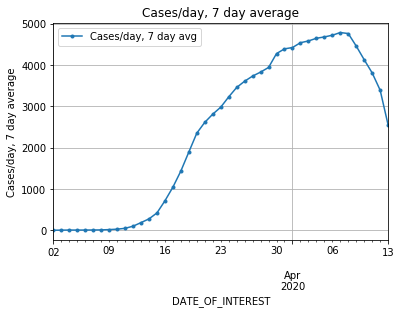

In [8]:
dat[["Cases/day, 7 day avg"]].plot(style=".-")
plt.ylabel("Cases/day, 7 day average")
plt.title("Cases/day, 7 day average")

In [34]:
hdat = pd.read_csv("../history.csv")

In [35]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-04-07,1.000000,NaN,NaN,10.0,10.0,1
1,2020-03-03,2020-04-07,1.500000,NaN,NaN,8.0,9.0,2
2,2020-03-04,2020-04-07,4.333333,NaN,NaN,9.0,9.0,10
3,2020-03-05,2020-04-07,3.750000,NaN,NaN,13.0,10.0,2
4,2020-03-06,2020-04-07,4.600000,NaN,NaN,10.0,10.0,8


In [36]:
dates = hdat["AS_OF"].unique()

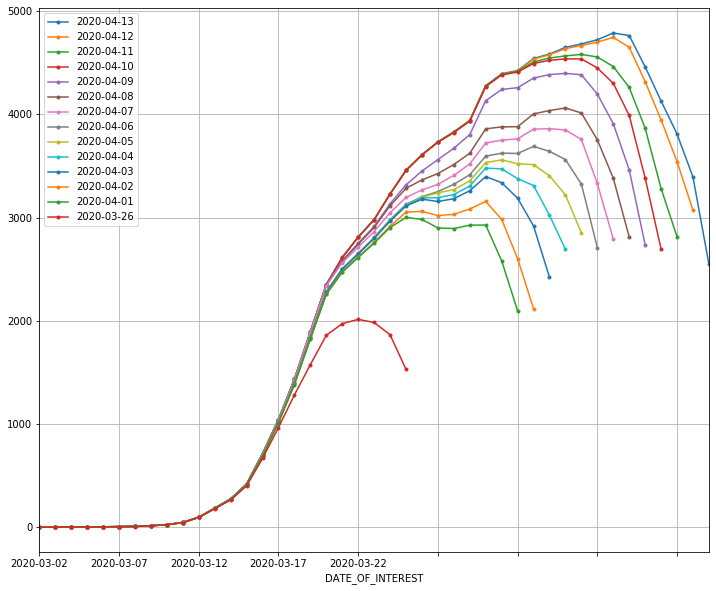

In [41]:
fig, ax = plt.subplots(figsize=(12,10))
dl = [d for d in dates if ((d != "2020-03-27") and (d != "2020-03-31"))]
dl.sort(reverse=True)

for date in dl:
    
    dat = hdat[hdat["AS_OF"] == date]
    dat.set_index("DATE_OF_INTEREST", inplace=True)
    dat[["Cases/day, 7 day avg"]].plot(style=".-", ax=ax)

ax.legend(dl)
plt.show()